In [21]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer
import numpy.ma.mrecords as mrecords

In [22]:
# Import & visualize dataset
dataset = pd.read_csv("pulsar_stars.csv")
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [23]:
print(dataset.describe(include="all"))

        Mean of the integrated profile  \
count                     17898.000000   
mean                        111.079968   
std                          25.652935   
min                           5.812500   
25%                         100.929688   
50%                         115.078125   
75%                         127.085938   
max                         192.617188   

        Standard deviation of the integrated profile  \
count                                   17898.000000   
mean                                       46.549532   
std                                         6.843189   
min                                        24.772042   
25%                                        42.376018   
50%                                        46.947479   
75%                                        51.023202   
max                                        98.778911   

        Excess kurtosis of the integrated profile  \
count                                17898.000000   
mean      

In [24]:
dataset.isnull().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [26]:
dataset.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [27]:
%whos


Variable                 Type         Data/Info
-----------------------------------------------
ColumnTransformer        ABCMeta      <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
DecisionTreeClassifier   ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
LogisticRegression       type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
OneHotEncoder            type         <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
RandomForestClassifier   ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SimpleImputer            type         <class 'sklearn.impute._base.SimpleImputer'>
StandardScaler           type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
dataset                  DataFrame            Mean of the integ<...>n[17898 rows x 9 columns]
mrecords                 module       <module 'numpy.ma.mrecord<...>es/numpy/ma/mrecords.py'>
np                       module       <module 'numpy' from '/op<...>k

In [28]:
dataset.rename(columns={' Mean of the integrated profile':'Mean_P', ' Standard deviation of the integrated profile':'STD_P', ' Excess kurtosis of the integrated profile':'Kurtosis_P', ' Skewness of the integrated profile':'Skewness_P', ' Mean of the DM-SNR curve':'Mean_SNRcurve', ' Standard deviation of the DM-SNR curve':'STD_SNRcurve', ' Excess kurtosis of the DM-SNR curve':'Kurtosis_SNRcurve', ' Skewness of the DM-SNR curve':'Skewness_SNRcurve'}, inplace=True)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mean_P             17898 non-null  float64
 1   STD_P              17898 non-null  float64
 2   Kurtosis_P         17898 non-null  float64
 3   Skewness_P         17898 non-null  float64
 4   Mean_SNRcurve      17898 non-null  float64
 5   STD_SNRcurve       17898 non-null  float64
 6   Kurtosis_SNRcurve  17898 non-null  float64
 7   Skewness_SNRcurve  17898 non-null  float64
 8   target_class       17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


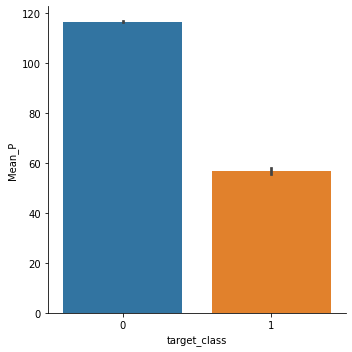

In [30]:
# Visualisations exploratoire 
# Effectuer sns.lmplot(x="Fare", y="Survived", data= dataset, logistic=True)
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="Mean_P", data = dataset, kind="bar")

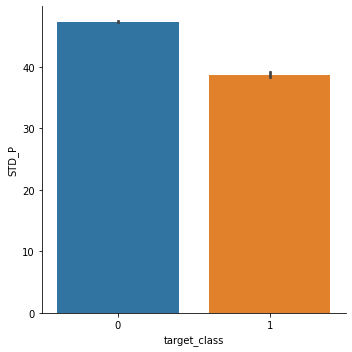

In [31]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="STD_P", data = dataset, kind="bar")

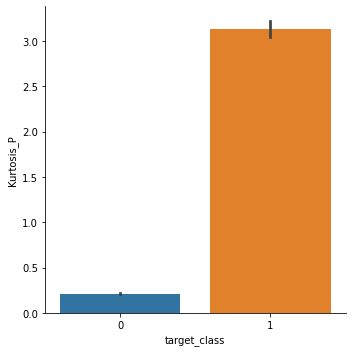

In [32]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="Kurtosis_P", data = dataset, kind="bar")

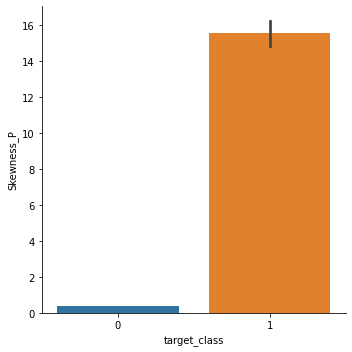

In [33]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="Skewness_P", data = dataset, kind="bar")

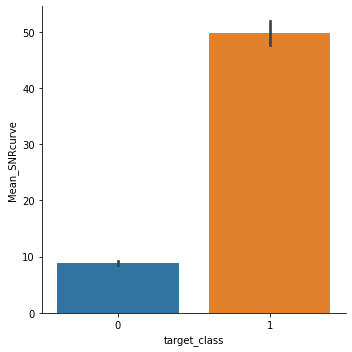

In [34]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="Mean_SNRcurve", data = dataset, kind="bar")

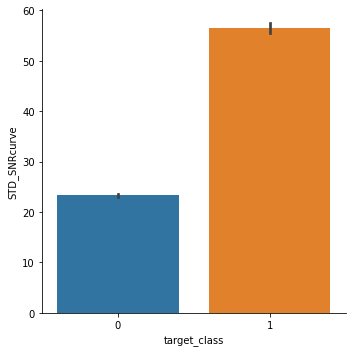

In [35]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="STD_SNRcurve", data = dataset, kind="bar")

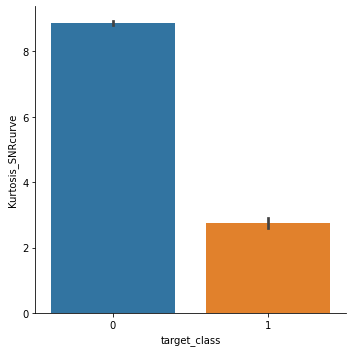

In [36]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="Kurtosis_SNRcurve", data = dataset, kind="bar")

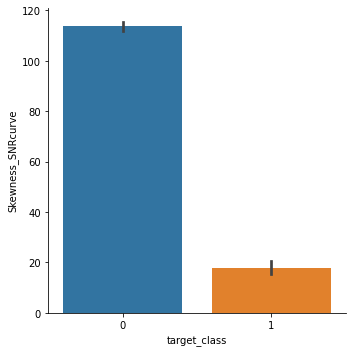

In [37]:
# Visualisations exploratoire 
# A verifier sur le plan astrophysique la cohérence de cette visualisation, 
#les colonnes semblent etre des mesures et non des catégories ou parametres influant le profil de la classe cible.
sns.catplot(x="target_class", y="Skewness_SNRcurve", data = dataset, kind="bar")

In [38]:
dataset.columns

Index(['Mean_P', 'STD_P', 'Kurtosis_P', 'Skewness_P', 'Mean_SNRcurve',
       'STD_SNRcurve', 'Kurtosis_SNRcurve', 'Skewness_SNRcurve',
       'target_class'],
      dtype='object')

In [39]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ]

X = dataset.loc[:,features_list] # We add feature_list into our loc 
y = dataset.loc[:,"target_class"] # We set "Profit" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



In [40]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


In [41]:
# Standardizing numeric features
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)

numeric_features = [0, 1, 2, 3 , 4, 5, 6, 7] 
numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
         
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
           Mean_P      STD_P  Kurtosis_P  Skewness_P  Mean_SNRcurve  \
3055   120.640625  47.842962    0.257963   -0.090620       8.048495   
10138  116.554688  48.702992    0.197625    0.232600       3.041806   
3600    66.773438  58.206289    1.838734    2.414939      73.643813   
16245   93.312500  34.314663    0.658339    2.928829       3.780936   
6079    99.343750  48.635513    0.470525    0.244099       1.701505   

       STD_SNRcurve  Kurtosis_SNRcurve  Skewness_SNRcurve  
3055      35.198234           4.819784          23.528383  
10138     16.610678           8.166185          84.846709  
3600      80.673494           0.649639          -0.918078  
16245     22.213667           7.446869          61.135290  
6079      13.167891          11.177091         156.605608  

Standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.37710226  0.18643192 -0.21304291 -0.30376654 -0.16236693  0.44549441
  -0.76498842 -0

In [45]:
# Training model 
print("Training model...")
classifier = LogisticRegression() # Instanciate model 
classifier.fit(X_train, y_train) # Fit model
print("...Done.")

Training model...
...Done.


In [46]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

#### First five predictions on TRAIN set ####
[0 0 1 0 0]


In [47]:
## Testing pipeline ###
print("--- Testing pipeline ---")

# Copy X_train to avoid caveats
X_test = X_test.copy()

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows 
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()


print("Final accuracy score on Test set: ",classifier.score(X_test, y_test))

--- Testing pipeline ---
Standardizing numerical features...
[[-0.33037172 -0.11773505 -0.23732528 ... -0.61785713  0.27184788
   0.11906273]
 [ 0.35601959  0.75894371 -0.31018935 ... -0.34603105 -0.06892838
  -0.29049852]
 [-0.07858447  1.67129596 -0.08498166 ... -0.3564755   0.22784672
  -0.09218444]
 ...
 [-0.30808433  0.17588034 -0.15189902 ... -0.41216229  0.01575433
  -0.21826785]
 [ 1.28968044  0.32494457 -0.44811457 ...  0.30277338 -0.83273235
  -0.79740389]
 [ 0.36294675 -0.31547399 -0.28669284 ... -0.58300801  0.0474542
  -0.08211858]]

...Done.
[[-4.28646968 -6.81398001 -0.67094683 -0.32963219 -0.44287455 -1.38067217
  -1.7724408  -0.98364533]
 [-4.2600085  -6.68601873 -0.73831118 -0.34539653 -0.4416896  -1.36681249
  -1.84792907 -0.98750741]
 [-4.27676299 -6.55285049 -0.53010199 -0.34735297 -0.44220196 -1.36734502
  -1.78218787 -0.98563735]
 [-4.23475485 -6.69466463 -0.8652991  -0.3389211  -0.44351919 -1.38797692
  -1.62410022 -0.97453259]
 [-4.30006601 -6.86994882 -0.40436

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# Evaluation du modèle 
print("Train score: ", classifier.score(X_train, y_train))
print("Test score: ", classifier.score(X_test, y_test))

Train score:  0.9779298784746473
Test score:  0.9729050279329609


--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


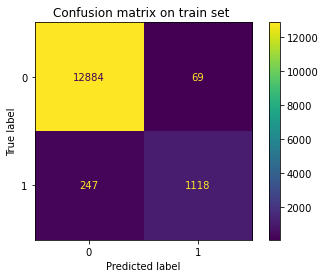

accuracy-score on train set :  0.9779298784746473


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


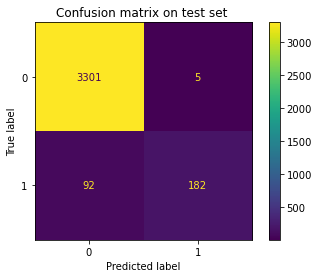

accuracy-score on test set :  0.9729050279329609


In [49]:
# Overfitting

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = plot_confusion_matrix(classifier, X_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = plot_confusion_matrix(classifier, X_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [79]:
# Feature Importance 
feature_importance = pd.DataFrame({"Features": ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ],
              "Values": (classifier.coef_.squeeze())})
feature_importance

,Features,Values
0,Mean_P,0.485004
1,STD_P,-0.137700
2,Kurtosis_P,5.983438
3,Skewness_P,-2.894446
4,Mean_SNRcurve,-0.813473
5,STD_SNRcurve,1.004600
6,Kurtosis_SNRcurve,0.015095
7,Skewness_SNRcurve,-0.384646


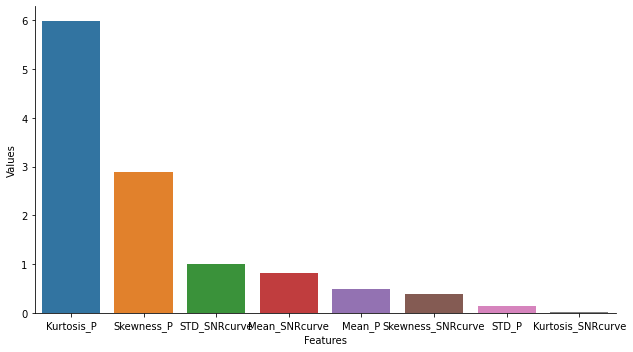

In [80]:
# Set coefficient to absolute values to rank features
feature_importance["Values"] = feature_importance["Values"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

In [82]:
# Decision Tree
# Training model
print("Training model...")
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
print("...Done.")


Training model...
...Done.


In [83]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_DT.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [84]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier_DT.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


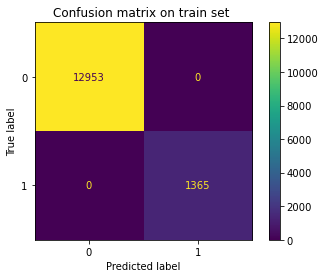

accuracy-score on train set :  1.0


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


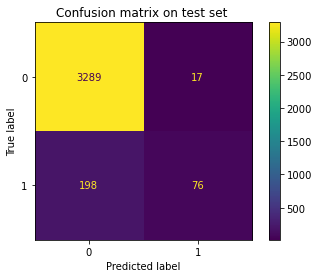

accuracy-score on test set :  0.9399441340782123


In [85]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm_DT = plot_confusion_matrix(classifier_DT, X_train, y_train)
cm_DT.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_DT.score(X_train, y_train))


cm_DT = plot_confusion_matrix(classifier_DT, X_test, y_test)
cm_DT.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_DT.score(X_test, y_test))

In [95]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_DT = pd.DataFrame({"Features": ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ],
              "Values": classifier_DT.feature_importances_})
feature_importance_DT.sort_values(["Values"], ascending=False)



,Features,Values
2,Kurtosis_P,0.797955
5,STD_SNRcurve,0.053997
1,STD_P,0.032185
3,Skewness_P,0.030099
0,Mean_P,0.029708
6,Kurtosis_SNRcurve,0.020927
7,Skewness_SNRcurve,0.019180
4,Mean_SNRcurve,0.015949


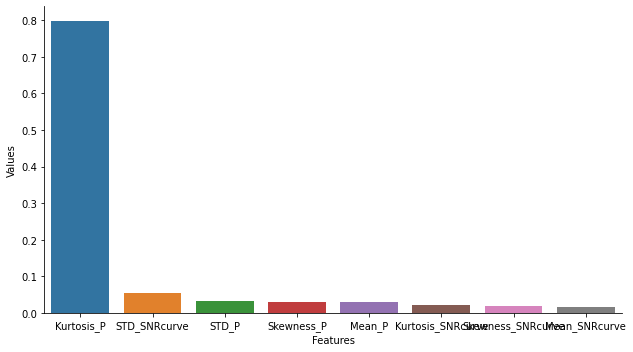

In [96]:
# Set coefficient to absolute values to rank features
feature_importance_DT["Values"] = feature_importance_DT["Values"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_DT.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

Train model...
...Done.
Train score:  0.9611677608604554
Test score:  0.896927374301676
--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


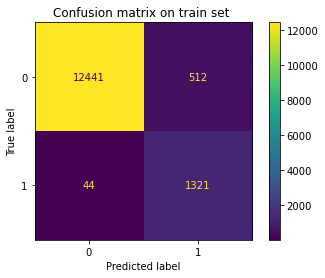

accuracy-score on train set :  0.9611677608604554


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


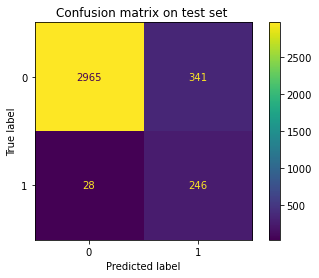

accuracy-score on test set :  0.896927374301676


In [97]:
#Our model is overfitting. Let's try to play with parameters min_samples=80
# Train model
print("Train model...")
classifier_DT1 = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier_DT1.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier_DT1.score(X_train, y_train))
print("Test score: ", classifier_DT1.score(X_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm_DT1 = plot_confusion_matrix(classifier_DT1, X_train, y_train)
cm_DT1.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_DT1.score(X_train, y_train))


cm_DT1 = plot_confusion_matrix(classifier_DT1, X_test, y_test)
cm_DT1.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_DT1.score(X_test, y_test))

In [98]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_DT1 = pd.DataFrame({"Features": ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ],
              "Values": classifier_DT1.feature_importances_})
feature_importance_DT1.sort_values(["Values"], ascending=False)

,Features,Values
2,Kurtosis_P,0.861287
5,STD_SNRcurve,0.070518
1,STD_P,0.017231
0,Mean_P,0.014764
3,Skewness_P,0.014611
4,Mean_SNRcurve,0.009152
7,Skewness_SNRcurve,0.008667
6,Kurtosis_SNRcurve,0.003770


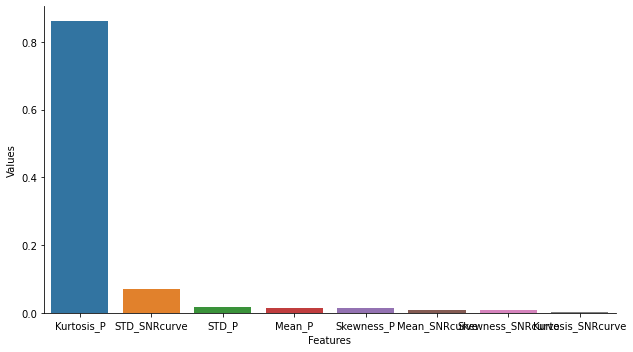

In [99]:
# Set coefficient to absolute values to rank features
feature_importance_DT1["Values"] = feature_importance_DT1["Values"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_DT1.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

Train model...
...Done.
Train score:  0.9558597569492946
Test score:  0.896927374301676
--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


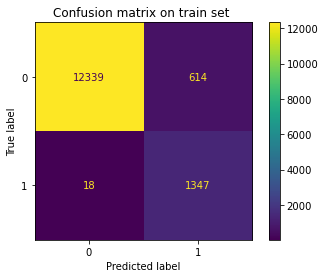

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy-score on train set :  0.9558597569492946


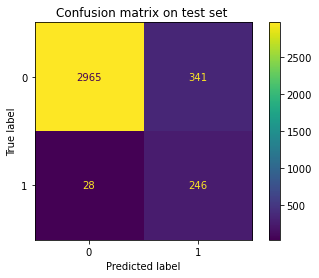

accuracy-score on test set :  0.896927374301676


In [109]:
#Our model is overfitting. Let's try to play with parameters min_samples=100
# Train model
print("Train model...")
classifier_DT2 = DecisionTreeClassifier(min_samples_split=60, class_weight="balanced" )
classifier_DT2.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")


print("Train score: ", classifier_DT2.score(X_train, y_train))
print("Test score: ", classifier_DT2.score(X_test, y_test))

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm_DT2 = plot_confusion_matrix(classifier_DT2, X_train, y_train)
cm_DT2.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_DT2.score(X_train, y_train))


cm_DT2 = plot_confusion_matrix(classifier_DT2, X_test, y_test)
cm_DT2.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_DT2.score(X_test, y_test))

In [110]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_DT2 = pd.DataFrame({"Features": ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ],
              "Values": classifier_DT2.feature_importances_})
feature_importance_DT2.sort_values(["Values"], ascending=False)

,Features,Values
2,Kurtosis_P,0.851079
5,STD_SNRcurve,0.071775
1,STD_P,0.018300
3,Skewness_P,0.017603
0,Mean_P,0.017470
4,Mean_SNRcurve,0.008998
6,Kurtosis_SNRcurve,0.007552
7,Skewness_SNRcurve,0.007224


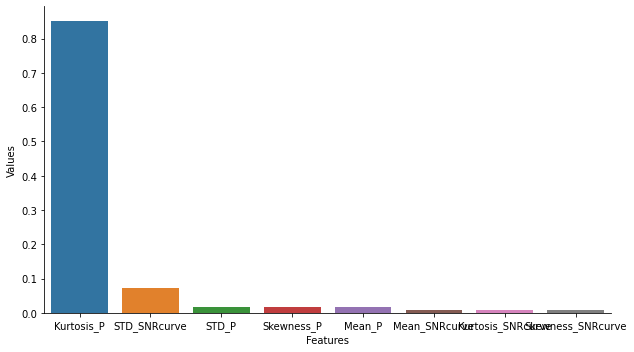

In [111]:
# Set coefficient to absolute values to rank features
feature_importance_DT2["Values"] = feature_importance_DT2["Values"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_DT2.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

In [112]:
#Random Forest nestimators = 30
# Training model
print("Training model...")
classifier_RF = RandomForestClassifier(n_estimators = 30)
classifier_RF.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [113]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_RF.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [114]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier_RF.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


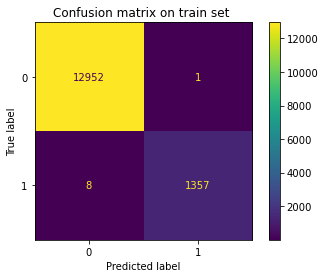

accuracy-score on train set :  0.9993714205894678


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


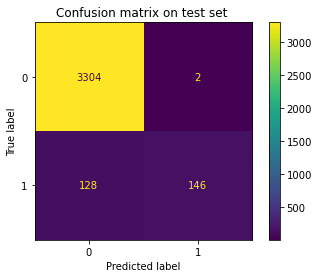

accuracy-score on test set :  0.9636871508379888


In [115]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm_RF = plot_confusion_matrix(classifier_RF, X_train, y_train)
cm_RF.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_RF.score(X_train, y_train))


cm_RF = plot_confusion_matrix(classifier_RF, X_test, y_test)
cm_RF.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_RF.score(X_test, y_test))


In [123]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_RF = pd.DataFrame({"Features": ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ],
              "Values": classifier_RF.feature_importances_})
feature_importance_RF.sort_values(["Values"], ascending=False)



,Features,Values
2,Kurtosis_P,0.290783
3,Skewness_P,0.191576
0,Mean_P,0.182630
5,STD_SNRcurve,0.115150
4,Mean_SNRcurve,0.075792
1,STD_P,0.064177
7,Skewness_SNRcurve,0.042930
6,Kurtosis_SNRcurve,0.036960


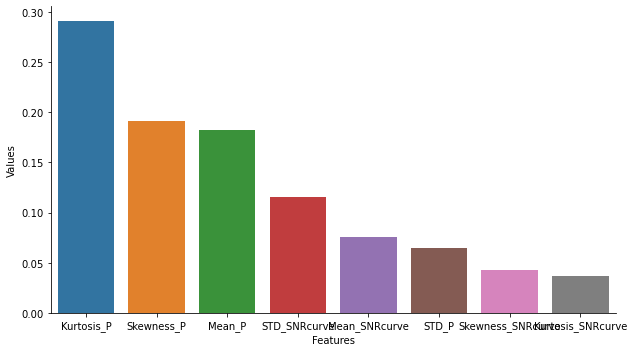

In [124]:
# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_RF.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

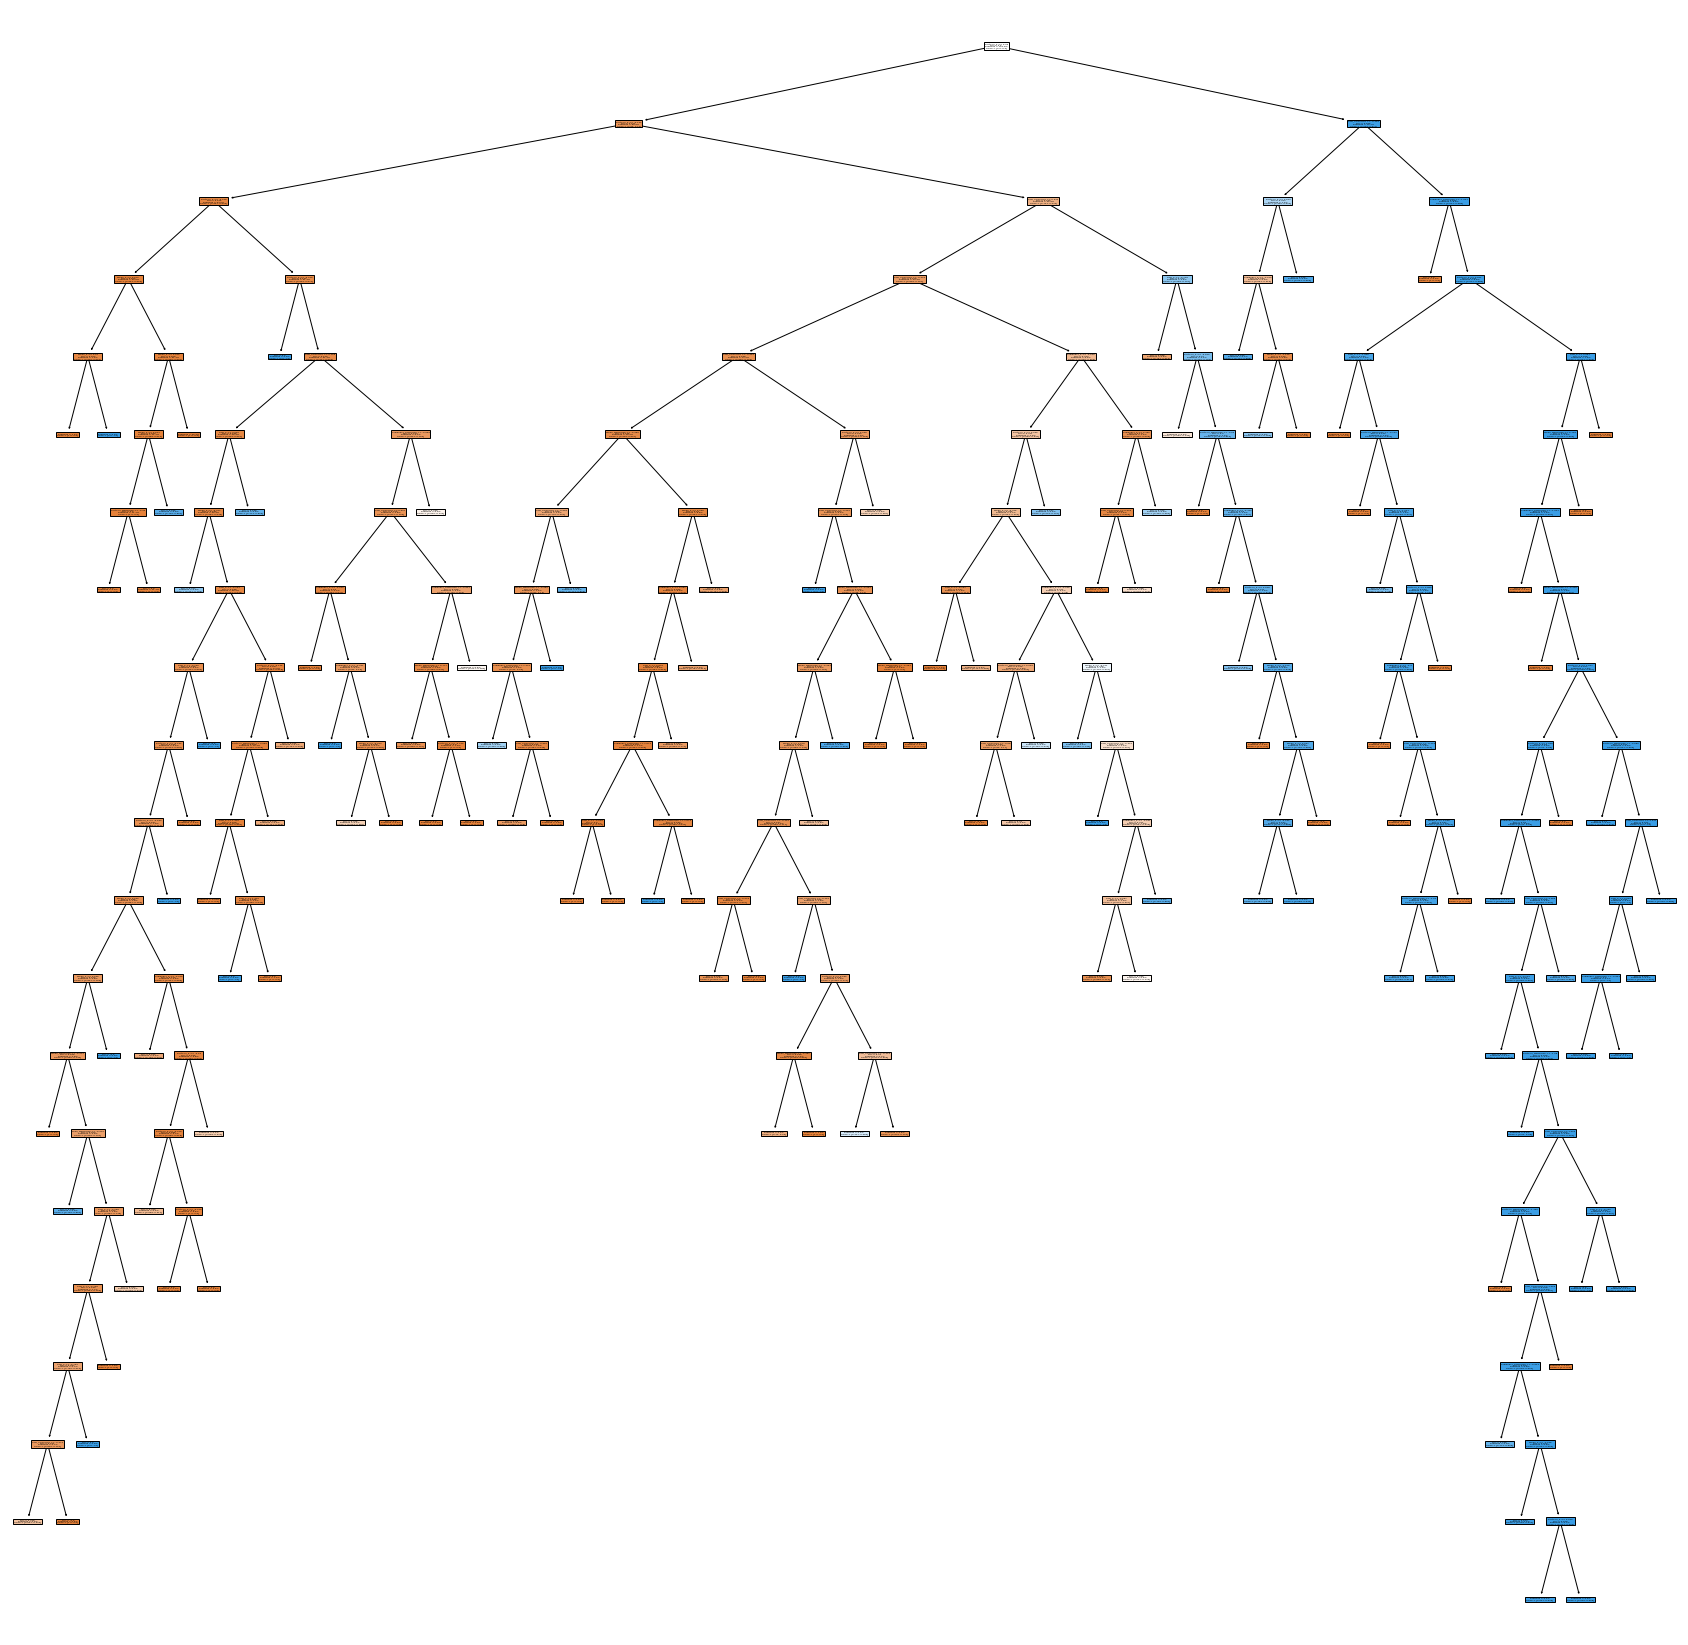

In [131]:
from sklearn.tree import plot_tree

classifier_RF = DecisionTreeClassifier(min_samples_split=100, class_weight="balanced")
classifier_RF.fit(X_train, y_train) # This steps is the actual training !


_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier_RF, filled=True, feature_names=["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve"], proportion=True,ax=ax)
plt.show()

In [134]:
#Random Forest nestimators = 100
# Training model
print("Training model...")
classifier_RF1 = RandomForestClassifier(n_estimators = 100)
classifier_RF1.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [135]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier_RF1.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [136]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier_RF1.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



--- Assessment of performances ---


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


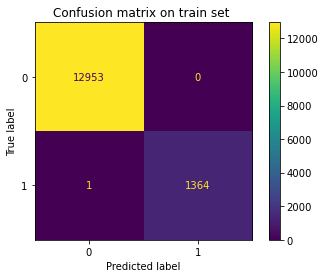

accuracy-score on train set :  0.9999301578432742


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


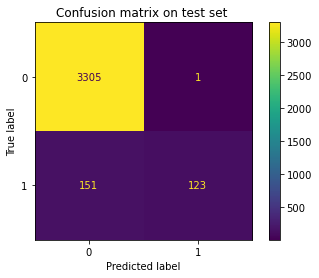

accuracy-score on test set :  0.9575418994413408


In [137]:
### Assessment of performances ###
print("--- Assessment of performances ---")


# Plot confusion matrix
cm_RF1 = plot_confusion_matrix(classifier_RF1, X_train, y_train)
cm_RF1.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_RF1.score(X_train, y_train))


cm_RF1 = plot_confusion_matrix(classifier_RF1, X_test, y_test)
cm_RF1.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_RF1.score(X_test, y_test))


In [138]:
# Feature importance en pourcentage (toutes les variables = 100%)
feature_importance_RF1 = pd.DataFrame({"Features": ["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve" ],
              "Values": classifier_RF1.feature_importances_})
feature_importance_RF1.sort_values(["Values"], ascending=False)


,Features,Values
2,Kurtosis_P,0.359509
3,Skewness_P,0.207217
0,Mean_P,0.144187
5,STD_SNRcurve,0.075924
4,Mean_SNRcurve,0.074013
7,Skewness_SNRcurve,0.049791
6,Kurtosis_SNRcurve,0.046293
1,STD_P,0.043065


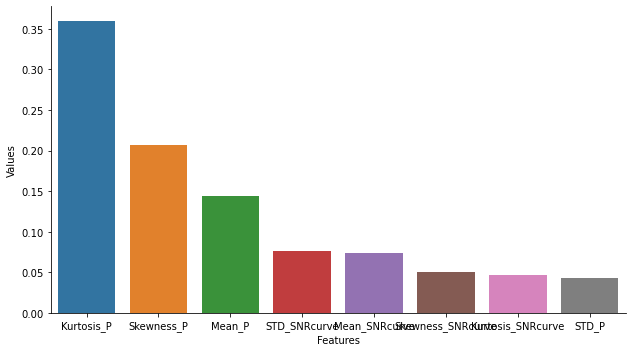

In [139]:
# Visualize ranked features using seaborn
sns.catplot(x="Features", 
            y="Values", 
            data=feature_importance_RF1.sort_values(by="Values", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

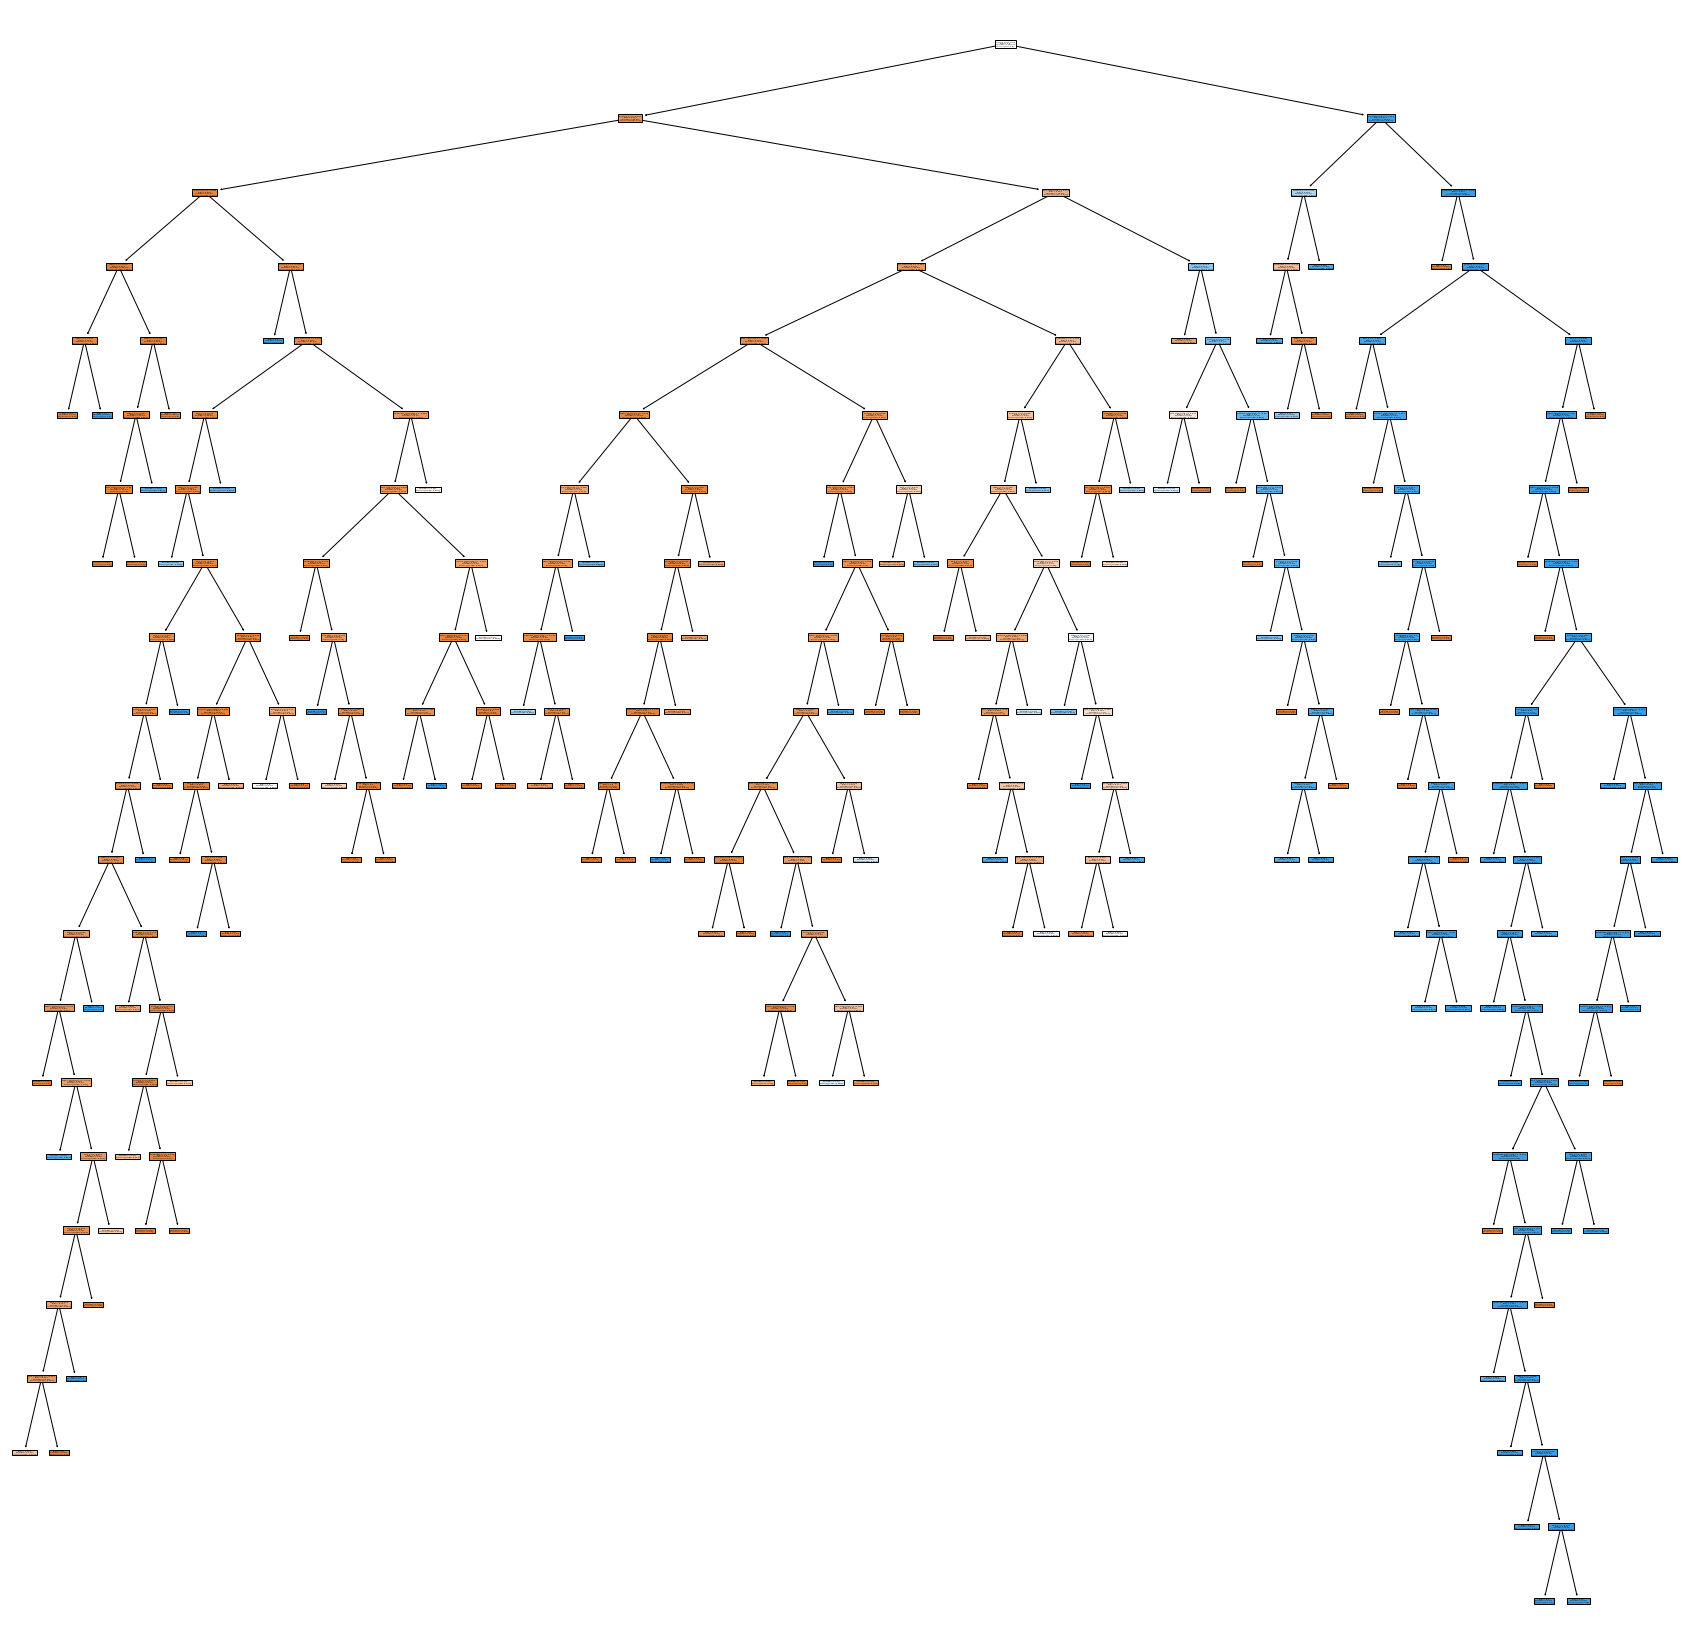

In [140]:
from sklearn.tree import plot_tree

classifier_RF1 = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced")
classifier_RF1.fit(X_train, y_train) # This steps is the actual training !


_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier_RF1, filled=True, feature_names=["Mean_P", "STD_P", "Kurtosis_P", "Skewness_P", "Mean_SNRcurve", "STD_SNRcurve", "Kurtosis_SNRcurve", "Skewness_SNRcurve"], proportion=True,ax=ax)
plt.show()